# CHAPTER 8 자연어 처리 시작하기

## 8-1 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치

KoNLPy는 Lucy Park이라는 분이 개발하였습니다. 검색해 보면, 다양한 튜토리얼과 많은 배울 것들이 있기에 꼭 블로그를 방문하여 기초를 다지는 것을 추천한다고 합니다. 특히 Github ID를 검색해보면 좋은 코드들을 많이 볼 수 있다고 합니다. 아래는 제 26회 한글 및 한국어 정보처리 학술대회 논문집(2014년)에 Lucy Park 님이 KoNLPy를 개발한 결과를 발표한 논문의 요약입니다.

> 파이썬은 간결한 아름다움을 추구하는 동시에 강력한 스트링 연산이 가능한 언어다. KoNLPy는 그러한 특장점을 살려, 파이썬으로 한국어 정보처리를 할 수 있게 하는 패키지 이다. 꼬꼬마, 한나눔, MeCab-ko 등 국내외에서 개발된 여러 형태소 분석기를 포함하고, 자연어처리에 필요한 각종 사전, 말뭉치, 도구 및 다양한 튜토리얼을 포함하여 손쉽게 한국어 분석을 할 수 있도록 만들었다.

파이썬에서 KoNLPy를 사용하기 위해서는 `pip install konlpy`명령으로 konlpy를 설차합니다. 그리고 Java SDK다운로드 페이지에서 JDK를 다운로드 합니다.

JDK 설치가 끝나면 JAVA_HOME설정도 해 주어야 한다고 합니다.

In [1]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 4.8 MB/s 
     |████████████████████████████████| 448 kB 51.2 MB/s 


아래에서 `stopwords`와 `punkt`를 다운로드한다.

In [4]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt
      Unzipping tokenizers/punkt.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [5]:
pip install wordcloud

In [6]:
pip install gensim

## 8-2 한글 자연어 처리 기초

KoNLPy는 꼬꼬마, 한나눔 등의 엔진을 사용할 수 있게 합니다.

### 먼저 꼬꼬마 모듈을 사용할 수 있게 합니다.

In [7]:
from konlpy.tag import Kkma
kkma = Kkma()

그리고 문장(sentences)분석을 합니다. \~\~시작합니다 재미있어요 \~\~ 에서 마침표(.)가 없어도 두 개의 문장으로 구분합니다.

In [8]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요 ~~')

['한국어 분석을 시작합니다', '재미있어요 ~~']

명사(nouns) 분석도 수행합니다.

In [9]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

형태소(pos) 분석도 수행합니다. 한글은 영어와 달리 형태 변화가 많아서 영어처럼 쉽게 접근하기 어렵습니다. 그래서 최소한의 의미 단위인 형태소로 언어를 분석하는 것이 일반적입니다.

In [10]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

### 이번에는 한나눔(Hannanum)을 사용해보겠습니다.

In [11]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

한나눔의 명사 분석은 꼬꼬마와는 약간 다른 결과를 가져옵니다.

In [12]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

한나눔의 형태소 분석 입니다.

In [13]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

위의 형태소는 단순 형태소 분석, 아래는 형태서 분석과 속성들입니다.

In [14]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

### 이번에는 Twitter 분석입니다.

In [15]:
from konlpy.tag import Twitter
t = Twitter()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [16]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [17]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

역시 미세한 차이를 가지고 있습니다.

In [18]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

## 8-3 워드 클라우드

워드 클라우드는 자주 나타나는 단어를 크게 보여줌으로써 직관적으로 텍스트를 알리는데 도움을 줍니다. 파이썬에서 사용할 수 있는 워드 클라우드도 몇 가지 있습니다만 여기서는 그 중 하나를 소개할까 합니다. 설치는 이미 8-1절에서 했으니 워드 클라우드 공식 Github에서 배포하는 튜토리얼을 일부 수정한 것을 우리도 튜토리얼 하고 다음 절로 넘어가도록 하겠습니다.

In [19]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

폴더에 저장하고 읽습니다. 또한 앨리스 그림도 저장합니다.

In [20]:
text = open('/content/drive/MyDrive/파이썬으로_데이터_주무르기/data/09. alice.txt').read()
alice_mask = np.array(Image.open('/content/drive/MyDrive/파이썬으로_데이터_주무르기/data/09. alice_mask.png'))

앨리스 소설에는 said라는 단어가 많이 등장하는 모양입니다. 이 단어는 카운트에서 제거하도록 하고 있습니다.

In [21]:
stopwords = set(STOPWORDS)
stopwords.add('said')

앨리스 그림을 확인합니다

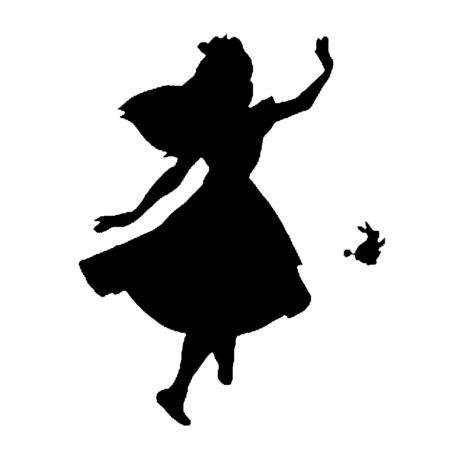

In [22]:
plt.figure(figsize = (8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

이제 문서 자체에서 단어를 카운트하는 기능을 워드 클라우드가 제공하니 그것을 사용해서 최빈 단어를 찾습니다.

In [23]:
wc = WordCloud(background_color = 'white', max_words = 2000, mask=alice_mask, stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

'Alice' 라는 단어가 가장 많이 등장했습니다.

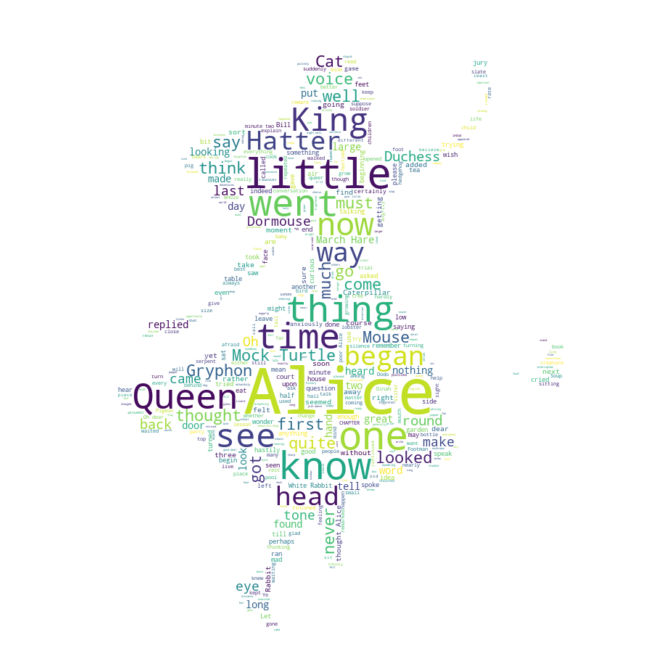

In [24]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### 다음은 스타워즈의 A New Hope 텍스트 입니다.

In [25]:
text = open('/content/drive/MyDrive/파이썬으로_데이터_주무르기/data/09. a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("Luke's", 'Luke')

mask = np.array(Image.open('/content/drive/MyDrive/파이썬으로_데이터_주무르기/data/09. stormtrooper_mask.png'))

여기서도 특수하게 처리해야 할 단어를 처리합니다.

In [26]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

워드 클라우드를 준비합니다.

In [27]:
wc = WordCloud(max_words = 1000, mask = mask, stopwords = stopwords,
                margin = 10, random_state = 1).generate(text)

default_colors = wc.to_array()

이번에는 앨리와는 약간 다르게 색상을 전체적으로 회색(grey)으로 채우도록 함수를 하나 만들어 둡니다.

In [28]:
import random
def grey_color_func(word, font_size, position, orientation,
                    random_state = None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

그리고 그려봅니다.

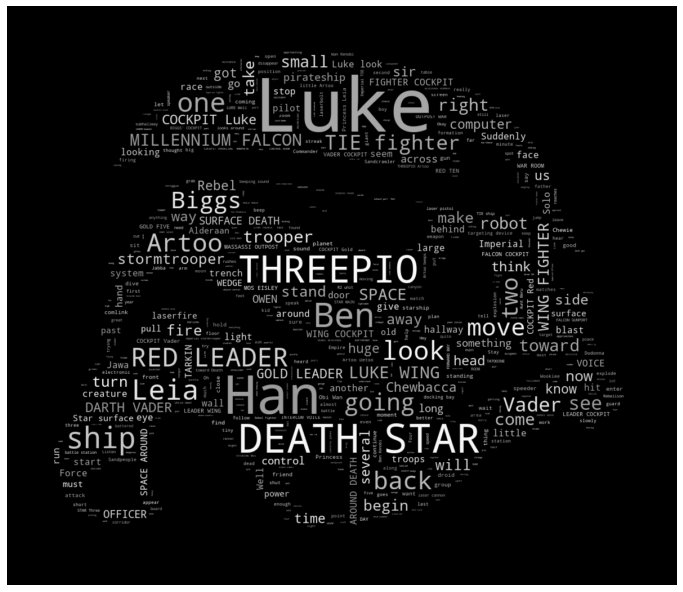

In [29]:
plt.figure(figsize = (12,12))
plt.imshow(wc.recolor(color_func = grey_color_func, random_state = 3),
           interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 8-4 육아휴직 관련 법안에 대한 분석

이번 절의 내용은 8-1절 에서 소개한 Lucy Park님의 KoNLPy가 내장하고 있는 법률 문서 중 하나를 가지고 기초적인 분석을 해보는 튜토리얼을 아주 미세한 부분 일부를 수정해서 학습하는 내용입니다.

먼저 nltk를 import 하고 KoNLPy의 내부 문서 중 육아휴직 관련 법안 제 1809890호를 읽습니다. 이 법률은 비록 공무원에 한정하고 있지만 육아휴직 대상이 되는 아이의 나이를 만 6세에서 만 8세로 확장하는 내용을 담고 있습니다.

In [30]:
import nltk

In [31]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [32]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

이 문서를 Twitter 분석기로 명사 분석을 하겠습니다.

In [33]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko[:10]

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['지방공무원법', '일부', '개정', '법률', '안', '정의화', '의원', '대표', '발의', '의']

그리고 수집된 단어의 횟수 `(len(ko.tokens))`와 고유한 횟수 `(len(set(ko.tokens)))`를 확인합니다.

In [34]:
ko = nltk.Text(tokens_ko, name = '대한민국 국회 의안 제 1809890호')

In [35]:
print(len(ko.tokens))       # returns number of tokens (document length)
print(len(set(ko.tokens)))  # returns number of unique tokens
ko.vocab()                  # returns frequency distribution

735
250


FreqDist({'가능': 4,
          '가정': 7,
          '각': 1,
          '값': 2,
          '개': 1,
          '개정': 8,
          '개정안': 3,
          '거나': 1,
          '것': 6,
          '것임': 2,
          '경비': 1,
          '경우': 16,
          '고': 1,
          '고용': 14,
          '고용노동부': 3,
          '곧': 1,
          '공무원': 10,
          '공포': 1,
          '관': 2,
          '관련': 2,
          '교육': 4,
          '구조': 1,
          '국가': 2,
          '국가공무원': 2,
          '국회예산정책처': 2,
          '규정': 1,
          '규칙': 1,
          '근거': 1,
          '근로자': 3,
          '급여': 8,
          '기': 1,
          '기간': 1,
          '기업체': 1,
          '기자': 1,
          '김': 1,
          '김을동': 1,
          '김정훈': 1,
          '김학송': 1,
          '나이': 2,
          '날': 1,
          '남녀': 1,
          '내용': 1,
          '논의': 1,
          '느': 1,
          '다만': 1,
          '다시': 1,
          '다음': 5,
          '단서': 1,
          '단위': 1,
          '달': 1,
          '대비': 1,
          '대상': 2,
   

많이 등장한 순으로 plot해볼 수 있습니다.

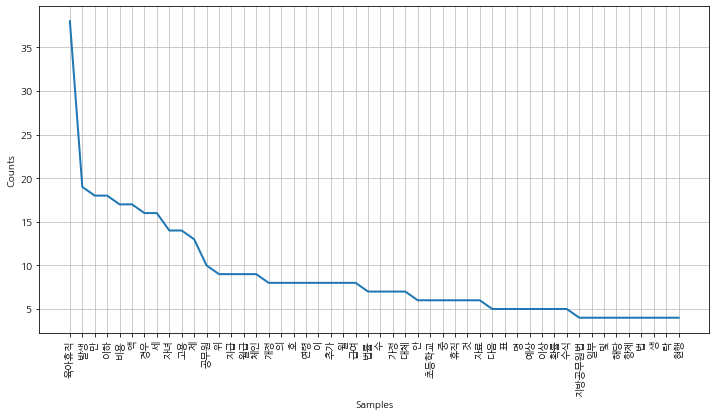

In [36]:
plt.figure(figsize = (12,6))
ko.plot(50)
plt.show()

당연하겠지만 '육아휴직'이라는 단어가 많이 등장합니다. 그런데 약간 의미 없는 단어도 보입니다. 한글은 영어와 달리 stopwords를 지정하기 쉽지 않습니다. 그래서 case-by-case로 지정하겠습니다.

In [37]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').',
              'x', '의','자','에','안','번',
              '호','을','이','다','만','로','가','를']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

그리고 난 후 다시 그려보겠습니다.

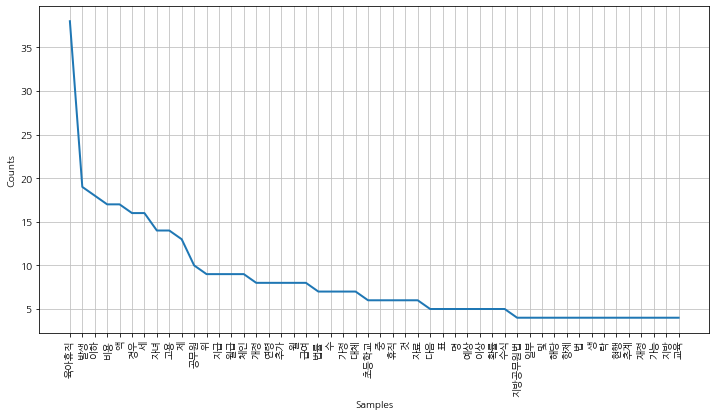

In [38]:
ko = nltk.Text(ko, name = '대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

(사실 나는 잘 모르겠지만) 이제 조금 더 좋아보입니다. 좀 더 stop_words변수에 의미 없어 보이는 단어를 추가하면 됩니다.

어떤 단어가 문서 내에서 몇 번 언급 되었는지 확인할 수 있습니다.

In [39]:
ko.count('초등학교')

6

또한 원하는 단어의 문서 내 위치를 개략적으로 그 분량과 함께 알 수 있습니다.

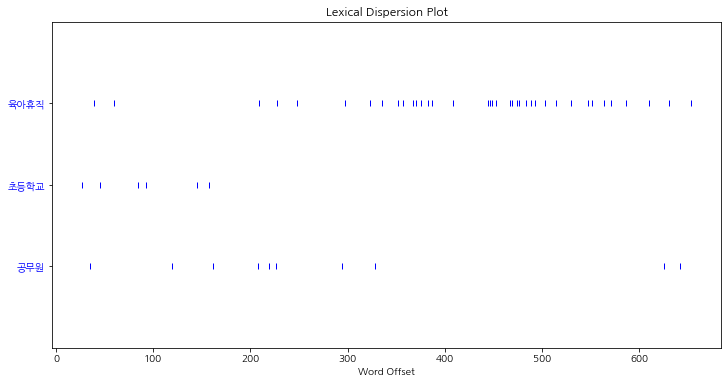

In [40]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

원하는 단어의 주변부 단어까지 확인할 수 있습니다.

In [41]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


또 문서 내에서 어떤 단어들이 연어(collocation)로 사용되었는지 알 수 있습니다.

In [42]:
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


그리고 앞 절에 학습한 워드 클라두드를 적용 해 보겠습니다.

한글 폰트에 대해 별도로 지정해야합니다. 맥과 윈도우 일떄 따로 지정해줬다고 합니다.

## 8-5 NaÏve Bayes Classifier 의 이해 - 영문

정만 심플한 분류기가 있습니다. 지도학습의 한 종류이면서 두 사건을 서로 독립이라고 가정하고 각각의 조건부 확률을 어떻게 한다는 개념입니다만, 이 책에서는 예제를 통해 이 분류기의 특성을 확인하고 간편하게 사용했다고 합니다.

지도학습이니까 긍정(pos), 부정(neg)이라는 태그가 있는데, i love you는 긍정, you like me는 부정입니다. 이 두 문장만 보면 i가 등잘할 때는 긍정입니다. like는 판단 못하겠네요 뭔가 느껴지시나요?

In [43]:
from nltk.tokenize import word_tokenize
import nltk

In [44]:
train = [('i like you', 'pos'),
         ('i hate you', 'neg'),
         ('you like me', 'neg'),
         ('i like her', 'pos')]

In [45]:
all_words = set(word.lower() for sentence in train
                                for word in word_tokenize(sentence[0]))

all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

위의 결과는 비록 너무 작은 수의 단어이지만, '말뭉치' 라고 해 두겠습니다.

그리고 그 말뭉치를 기준으로 train문장에 속한 단어인지 아닌지를 기록합니다.

In [46]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                            for x in train]

t

[({'hate': False,
   'her': False,
   'i': True,
   'like': True,
   'me': False,
   'you': True},
  'pos'),
 ({'hate': True,
   'her': False,
   'i': True,
   'like': False,
   'me': False,
   'you': True},
  'neg'),
 ({'hate': False,
   'her': False,
   'i': False,
   'like': True,
   'me': True,
   'you': True},
  'neg'),
 ({'hate': False,
   'her': True,
   'i': True,
   'like': True,
   'me': False,
   'you': False},
  'pos')]

train의 첫 문장인 'i like you' 의 경우, 말뭉치 단어 [hate, her, i ,like, me, you]를 기준으로 해당 단어가 있는지 없는지를 기록해 둔 것입니다.

이제 이를 이용하여 NaÏve Bayes 분류기를 동작시키도롭 합니다.

In [47]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                      me = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                    hate = False             pos : neg    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0


위의 결과를 잘 이해하면, NaÏve Bayes분류기를 이해하기 편합니다. Train 문장에 붙은 긍정/부정 태그를 이용해서 분류한 결과 'hate'이라는 단어가 없을 때(False) 긍정일 비율이 1.7:1이라는 의미 입니다.

'like' 라는 단어가 총 세 번 사용되었고, 그 중 2개 문장이 긍정의 의미였습니다. 그래서 'like'가 있을 때(True) 긍정일 확률이 1.7:1 입니다. 문장이 4개 뿐이라서 전체 단어를 놓고 생각하기 어렵지 않습니다.

이번에는 테스트 문장(test_sentence)를 'i like MeRui'로 만들어보겠습니다.

In [48]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower():
                            (word in word_tokenize(test_sentence.lower()))
                            for word in all_words}
test_sent_features

{'hate': False,
 'her': False,
 'i': True,
 'like': True,
 'me': False,
 'you': False}

그리고 이를 위에서 만든 분류기에 통과시켜 보겠습니다.

In [49]:
classifier.classify(test_sent_features)

'pos'

'pos'하다는 결과가 나옵니다. 물론 겨우 4개의 문장을 가지고 이런 결과가 나오게 유도한 것이지만, 목적은 예제니까요.


만약 분류기를 가동시킬 문장이 많다면 아주 신뢰성 있는 결론을 얻을 수 있을 것입니다.
굉장히 'naive'하지만 정말 잘 동작한다는 평가를 받은것이 NaÏve Bayes Classifier입니다.

## 8-6 NaÏve Bayes Classifier의 이해 - 한글

In [50]:
from konlpy.tag import Twitter

In [51]:
pos_tagger = Twitter()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


이제 8-5절의 내용을 한글로도 적용시켜 보겠습니다. 그러나 한글에서는 형태소 분석을 통해야 합니다. 일단 형태소 분석을 하지 않으면 어떻게 되는지 확인을 해 보겠습니다.

In [52]:
train = [('메리가 좋아', 'pos'),
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

위의 문장들을 가지고 말뭉치를 만들겠습니다.

In [53]:
all_words = set(word.lower() for sentence in train
                for word in word_tokenize(sentence[0]))

all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

벌써 '고양이도'와 '고양이야', '메리가'와 '메리는'이 다른 단어로 잡힌 것을 볼 수 있습니다.

그럼 동일 과정을 거친 후,

In [54]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                      me = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                    hate = False             pos : neg    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0


만들어진 분류기의 동작을 장담하기 어렵습니다.

In [55]:
test_sentene = '난 수업이 마치면 메리랑 놀거야'

긍정적 결과가 나와야 할 거 같은 위 테스트 문장을 적용해 보겠습니다.

In [56]:
test_sent_features = {word.lower():
                                    (word in word_tokenize(test_sentence.lower()))
                                    for word in all_words}

test_sent_features

{'고양이도': False,
 '고양이야': False,
 '난': False,
 '놀거야': False,
 '마치고': False,
 '메리가': False,
 '메리는': False,
 '메리랑': False,
 '수업이': False,
 '이쁜': False,
 '좋아': False,
 '지루해': False}

그러면 다음과 같이 부정적(neg)가 나타납니다. 

In [57]:
classifier.classify(test_sent_features)

'pos'

????????왜 pos 이죠? .... 책에 써있는거랑 다른데 .. 버전이 업데이트 됐다고 생각하고... 아래에 계속 진행 해 보겠습니다 ㅜㅜ

결국 한국을 다룰 때는 형태소 분석이 필요합니다.

In [58]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem = True)]

8-1절에사 소개한 Lucy Park님에 다르면, 위 함수처럼 태그를 붙여주는 것이 유리하다고 합니다. 위 코드의 tokenize 함수를 사용해서 train문장을 분석합니다.

In [59]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

그리고 전체 말뭉치도 만들어줍니다.

In [60]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

말뭉치에 있는 단어가 있는지 아닌지를 구분하는 함수를 만들어서 train 문장에 적용합니다. 조사(Josa)인지 명사(Noun)인지 구분이 잘 돼있어서 판독하기 좋습니다.

In [61]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [62]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'가/Josa': True,
   '고/Josa': False,
   '고양이/Noun': False,
   '난/Noun': False,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': False,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': True,
   '수업/Noun': False,
   '야/Josa': False,
   '이/Josa': False,
   '이쁘다/Adjective': False,
   '좋다/Adjective': True,
   '지루하다/Adjective': False},
  'pos'),
 ({'가/Josa': False,
   '고/Josa': False,
   '고양이/Noun': True,
   '난/Noun': False,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': True,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': False,
   '수업/Noun': False,
   '야/Josa': False,
   '이/Josa': False,
   '이쁘다/Adjective': False,
   '좋다/Adjective': True,
   '지루하다/Adjective': False},
  'pos'),
 ({'가/Josa': False,
   '고/Josa': False,
   '고양이/Noun': False,
   '난/Noun': True,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': False,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': False,
   '수업/Noun': True,
   '야/Josa': False,
   '이/Josa': True,
   '이쁘다/Adjective': False,


이제 분류기를 동작시킵니다.

In [63]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

그러고 나서 형태소분석을 안 했을 때 부정되었던 문장을 다시 가지고 테스트 하겠습니다.

In [64]:
test_sentnece = [("난 수업이 마치면 메리랑 놀거야")]

그리고 역시 동일하게 형태소 분석합니다.

In [65]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('i', 'Alpha')]

In [66]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('i', 'Alpha'): False}

이제 결과를 보겠습니다.

In [67]:
classifier.classify(test_sent_features)

'pos'

예상대로, 정확하게는 의도한 대로 긍정(pos)의 의미가 잘 드러났습니다.

## 8-7 문장의 유사도 측정하기

앞 절에서 간략하게 분류에 대해 이야기 했습니다. 그러나 지도학습이어서 미리 정답을 알고 있어야 합니다. 이번 절에서는 많은 문장 혹은 문서들 중에서 유사한 문장을 찾아내는 방법에 대해 설명하겠습니다. 마냑 어떤 문장을 벡터로 표현할 수 있다면 벡터간 거리를 구하는 방법으로 정말 손쉽게 해결할 수 있습니다.

먼저 scikit-leartn에서 텍스트의 특징(feature)을 추출하는 모듈에서 CountVectorizer라는 함수를 import합니다.

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
vectorizer = CountVectorizer(min_df = 1)

그리고 유사한 문장을 연습용으로 사용하겠습니다. 실제로는 아주 많은 문장을 대상으로 해야하지만 지금은 그저 절차를 연습하는 과정이니까요.

In [70]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떡하죠?',
            '메리는 공원에서 산책하고 노는 것을 싫어해요',
            '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
            '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [73]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떡하죠',
 '여행을',
 '이상해요',
 '있어요']